https://seaborn.pydata.org/

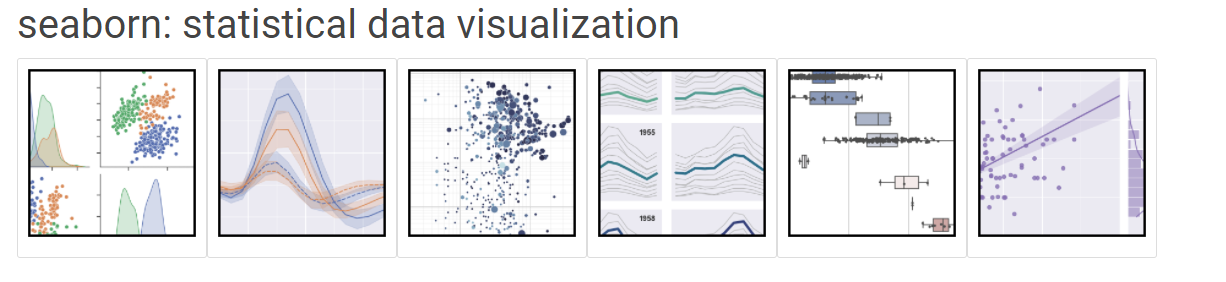



Seaborn is a statistical data visualization library. It's built on top of matplotlib and tries to "make a well-defined set of hard things easy" ([introduction to Seaborn](http://seaborn.pydata.org/introduction.html)).

One advantage over matplotlib is that it works natively with DataFrame objects.




https://seaborn.pydata.org/tutorial/function_overview.html


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

https://en.wikipedia.org/wiki/Iris_flower_data_set


https://github.com/allisonhorst/palmerpenguins

In [2]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# matplotlib vs seaborn

In [3]:
import matplotlib.pyplot as plt

In [4]:
# Create some data
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

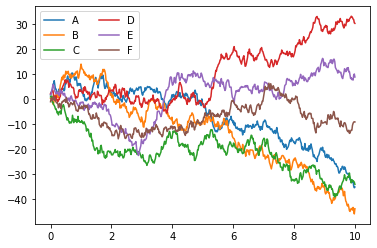

In [5]:
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

In [6]:
z = np.cumsum(rng.randn(500,6),0)
df = pd.DataFrame(z,columns=['A','B','C','D','E','F'])
df['G'] = np.linspace(0,10,500)

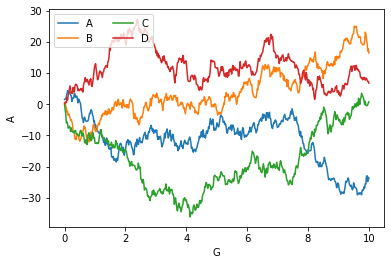

In [8]:
sns.lineplot(data=df,x='G',y='A')
sns.lineplot(data=df,x='G',y='B')
sns.lineplot(data=df,x='G',y='C')
sns.lineplot(data=df,x='G',y='D')
plt.legend('ABCD', ncol=2, loc='upper left');

In [9]:
# theme
sns.set_theme(style="darkgrid")

### Scatter plots

In [10]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


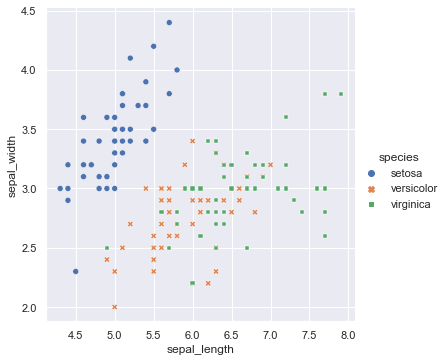

In [11]:
sns.relplot(data=df, x='sepal_length', y='sepal_width', hue='species', style='species');

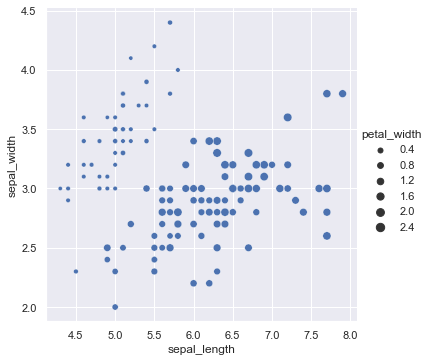

In [12]:
sns.relplot(data=df, x='sepal_length', y='sepal_width', size='petal_width');

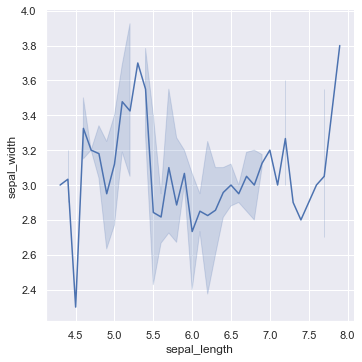

In [15]:
sns.relplot(data=df,x='sepal_length',y='sepal_width',kind='line')

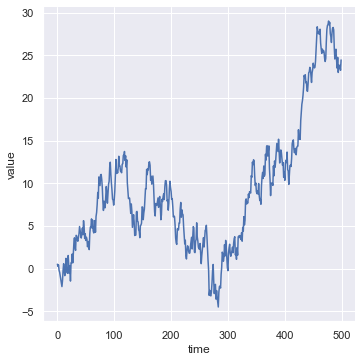

In [16]:
df = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
#g.fig.autofmt_xdate()

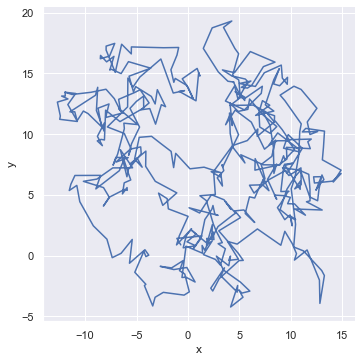

In [17]:
#no sort
df = pd.DataFrame(np.random.randn(500, 2).cumsum(axis=0), columns=["x", "y"])
sns.relplot(x="x", y="y", sort=False, kind="line", data=df);

# Joint

In [18]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


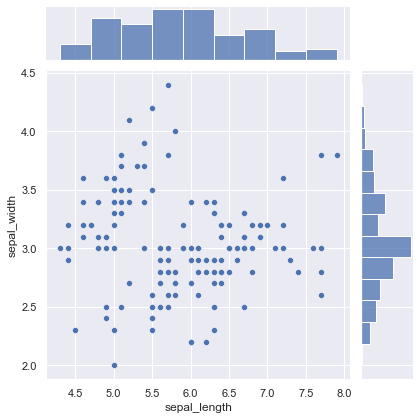

In [19]:
sns.jointplot(data=df, x='sepal_length', y='sepal_width');

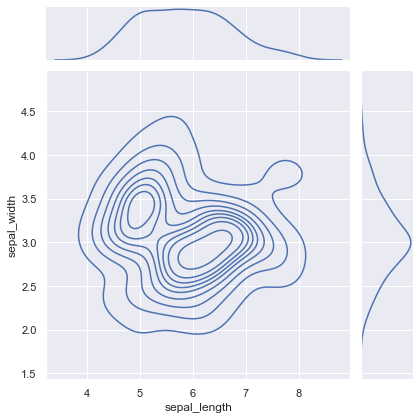

In [20]:
sns.jointplot(data=df, x='sepal_length', y='sepal_width', kind='kde');

# Joint Grid

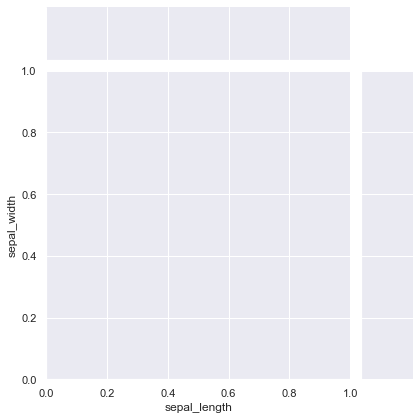

In [21]:
 #JointGrid
 # This is an object that has methods
 # Allows to do more complicated things
sns.JointGrid(data=df, x='sepal_length', y='sepal_width');

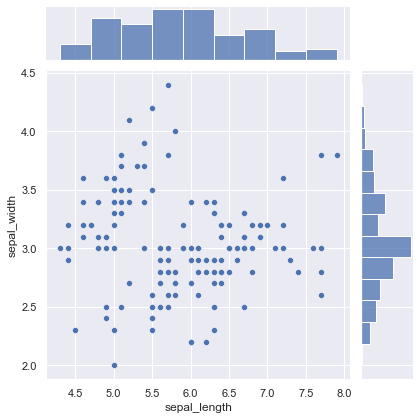

In [22]:
f = sns.JointGrid(data=df, x='sepal_length', y='sepal_width');
f.plot(sns.scatterplot, sns.histplot);

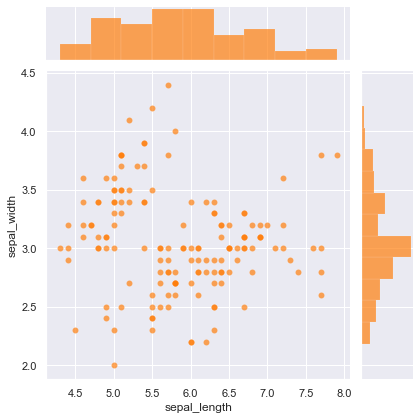

In [23]:
#with options
g = sns.JointGrid(data=df, x='sepal_length',y='sepal_width')
g.plot(sns.scatterplot, sns.histplot, alpha=.7, linewidth=.1 ,color='tab:orange')

# Histogram

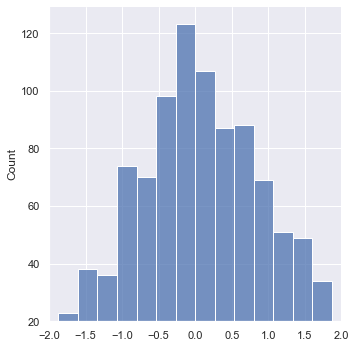

In [24]:
xs = np.random.normal(size=1000)

# Figure level function
ax = sns.displot(xs);
ax.set(xlim=(-2, 2))
ax.set(ylim=(20,None))

By default, displot()/histplot() choose a default bin size based on the variance of the data and the number of observations.

But you should not be over-reliant on such automatic approaches, because they depend on particular assumptions about the structure of your data. It is always advisable to check that your impressions of the distribution are consistent across different bin sizes

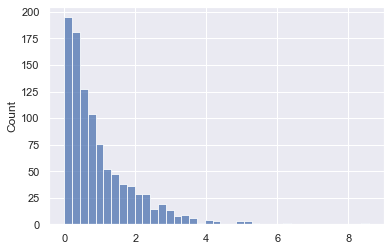

In [25]:
xs = np.random.exponential(size=1000)

# axes-level function
ax = sns.histplot(xs)
#ax.set(xlim=(-2, 2))
#ax.set(ylim=(20,None))

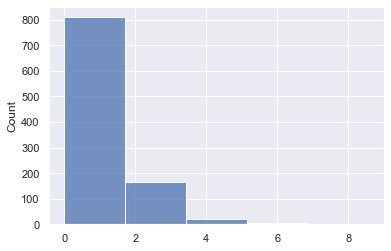

In [26]:
# axes-level function
ax = sns.histplot(xs,bins=5)
#ax.set(xlim=(-2, 2))
#ax.set(ylim=(20,None))

stat{“count”, “frequency”, “density”, “probability”}
Aggregate statistic to compute in each bin.

**count** shows the number of observations

**frequency** shows the number of observations divided by the bin width

**density** normalizes counts so that the area of the histogram is 1

probability normalizes counts so that the sum of the bar heights is 1

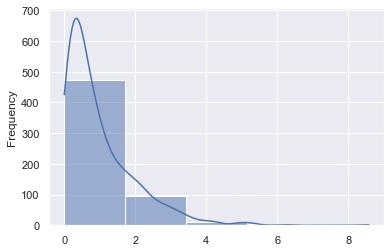

In [27]:
# axes-level function
ax = sns.histplot(xs,bins=5,kde=True,stat="frequency")

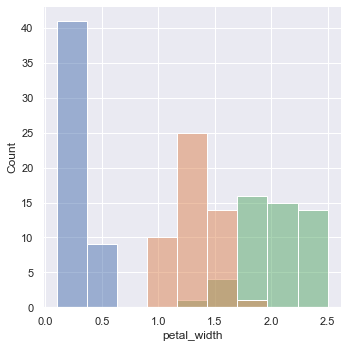

In [28]:
sns.displot(data=df,x='petal_width',hue='species',legend=False)

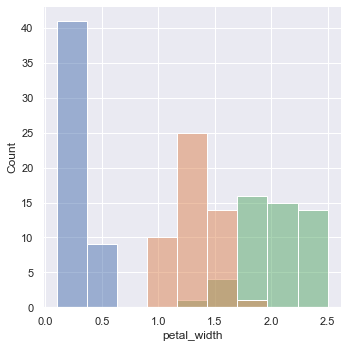

In [29]:
sns.displot(data=df,x='petal_width',hue='species',legend=False)

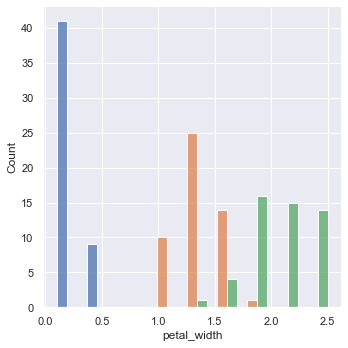

In [30]:
sns.displot(data=df,x='petal_width',hue='species',legend=False,multiple='dodge')

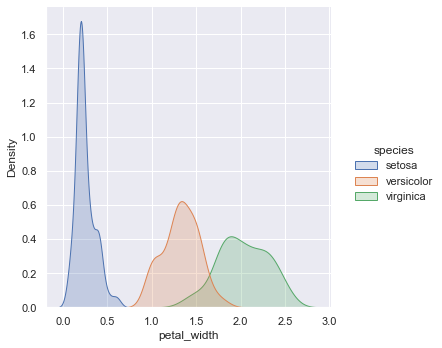

In [31]:
sns.displot(data=df,x='petal_width',hue='species',legend=True,fill=True,kind='kde')

<AxesSubplot:xlabel='petal_width', ylabel='Density'>

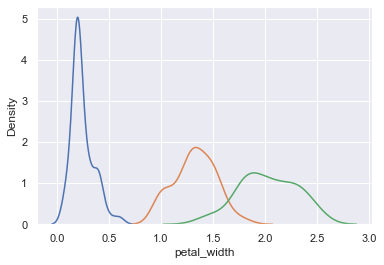

In [32]:
df_setosa=df[df['species']=='setosa']
df_versicolor=df[df['species']=='versicolor']
df_virginica=df[df['species']=='virginica']


sns.kdeplot(data=df_setosa,x='petal_width')
sns.kdeplot(data=df_versicolor,x='petal_width')
sns.kdeplot(data=df_virginica,x='petal_width')

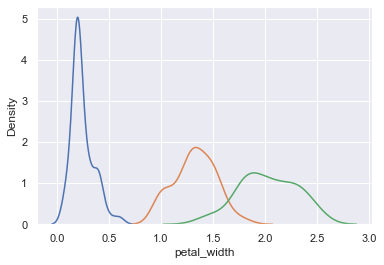

In [33]:
# More efficient
df_setosa=df[df['species']=='setosa']
df_versicolor=df[df['species']=='versicolor']
df_virginica=df[df['species']=='virginica']
df_list=[df_setosa,df_versicolor,df_virginica]

for x in df_list:
    sns.kdeplot(data=x,x='petal_width')

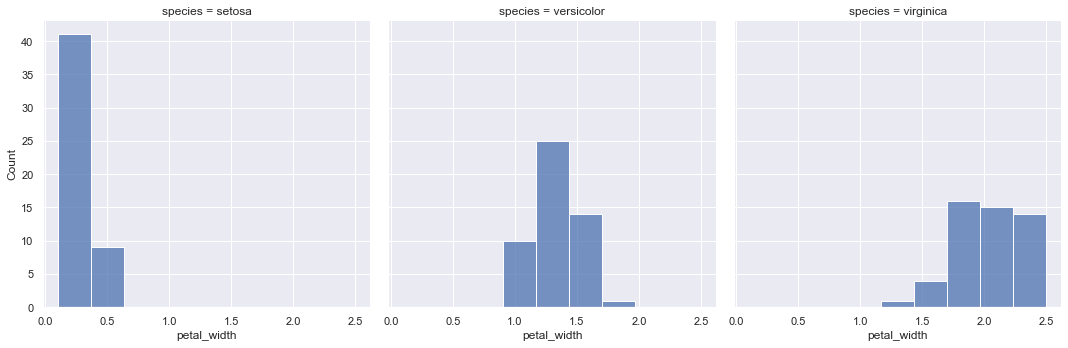

In [34]:
sns.displot(data=df,x='petal_width',col='species',legend=False)

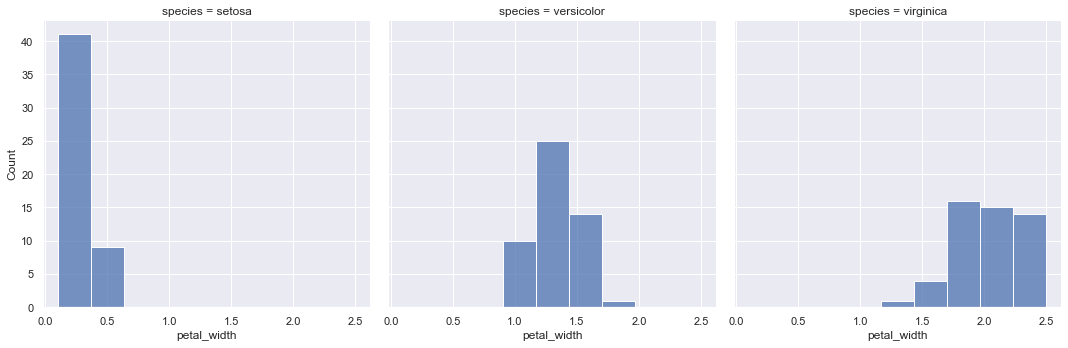

In [35]:
sns.displot(data=df,x='petal_width',col='species',multiple='dodge',legend=False)

# Pairwise relationships

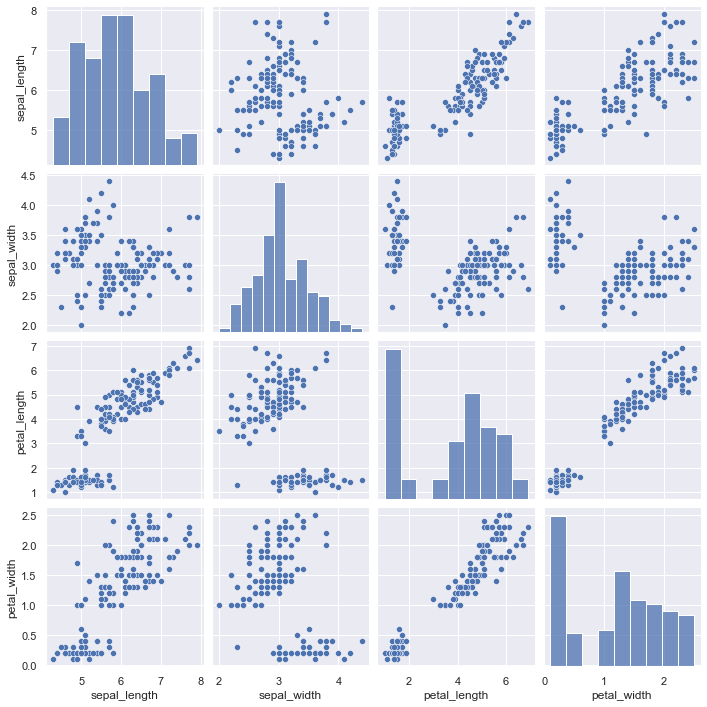

In [36]:
sns.pairplot(df)

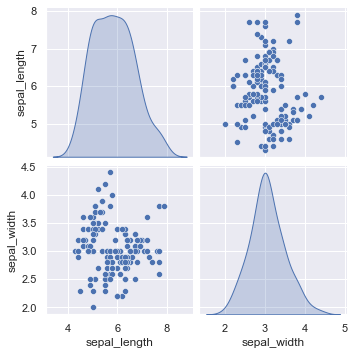

In [38]:
sns.pairplot(df[['sepal_length', 'sepal_width']], diag_kind='kde')

Muy útil cuando no se conoce un dataset de antemano, ya que se pueden sacar conclusiones rápidas. Por ejemplo, aquí se observa cómo el *petal_lenght* y el *petal_width* están correlacionados linealmente.

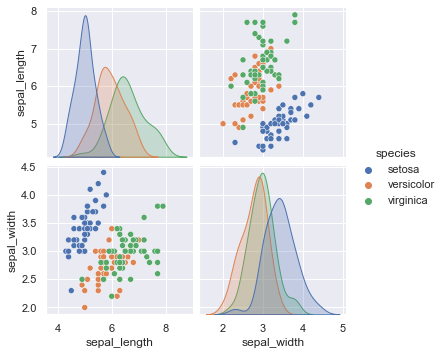

In [39]:
sns.pairplot(df[['sepal_length','sepal_width','species']],diag_kind='kde',hue='species')

### Linear relationships

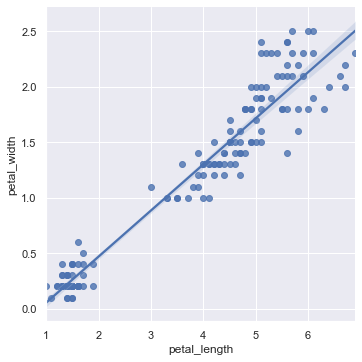

In [40]:
sns.lmplot(data=df,x='petal_length',y='petal_width')

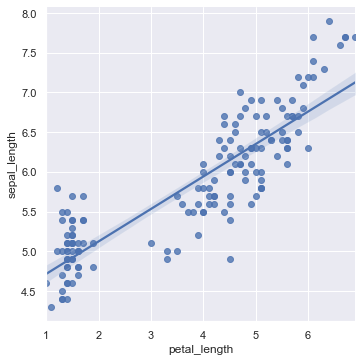

In [41]:
sns.lmplot(data=df,x='petal_length',y='sepal_length')

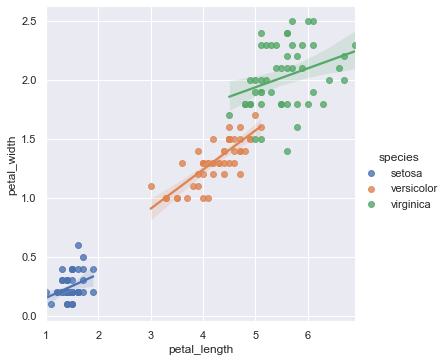

In [42]:
sns.lmplot(data=df,x='petal_length',y='petal_width',hue='species')

# Categorical Data

https://seaborn.pydata.org/tutorial/categorical.html

#### swarm and strip plot

In [43]:
df = sns.load_dataset('penguins')

In [44]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


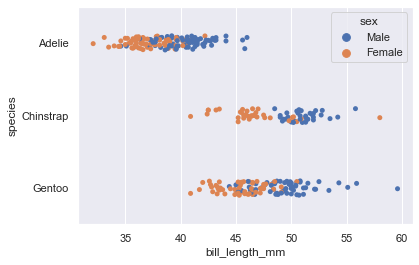

In [45]:
sns.stripplot(data=df,x='bill_length_mm',y='species', hue='sex');

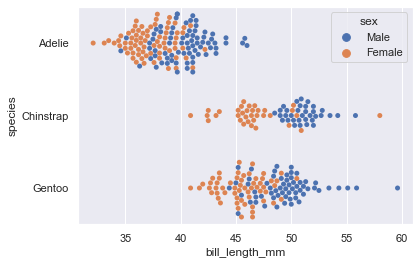

In [46]:
sns.swarmplot(data=df,x='bill_length_mm',y='species', hue='sex');

# Boxplot
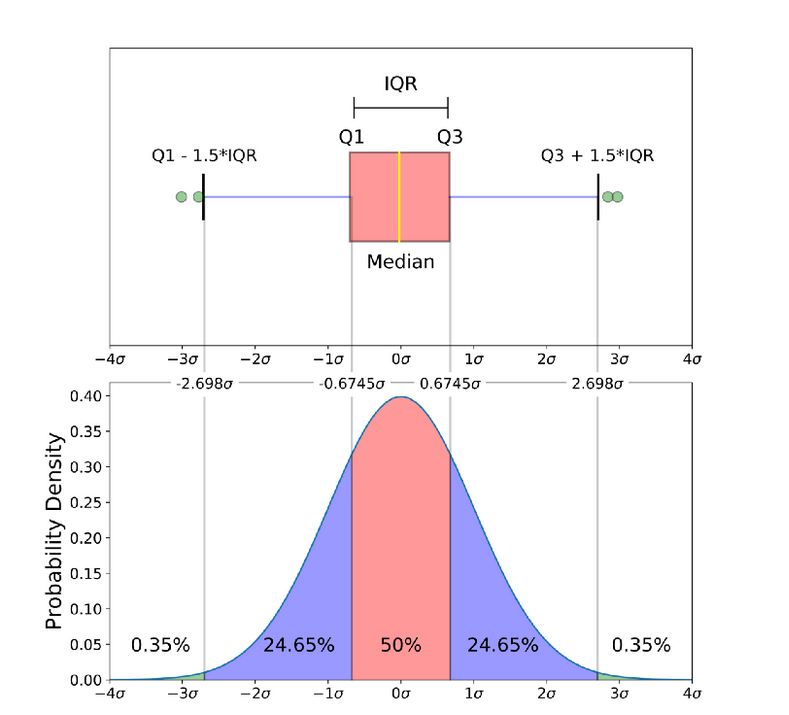


Sirve para mirar relaciones entre variables categóricas y su distribución. **Es un plot muy muy utilizado.**

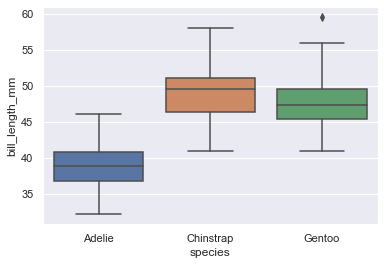

In [47]:
sns.boxplot(data=df,x='species',y='bill_length_mm');

Se ve claramente que el pico del *Adelie* es en general notablemente más corto.

<AxesSubplot:xlabel='species', ylabel='bill_length_mm'>

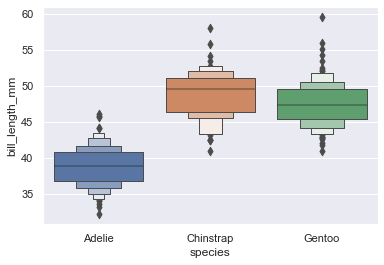

In [49]:
# Draw an enhanced box plot for larger datasets.
sns.boxenplot(data=df, x='species', y='bill_length_mm')

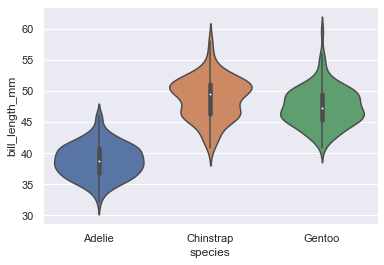

In [50]:
sns.violinplot(data=df,x='species',y='bill_length_mm'); # Más precisos

### Ejercicio

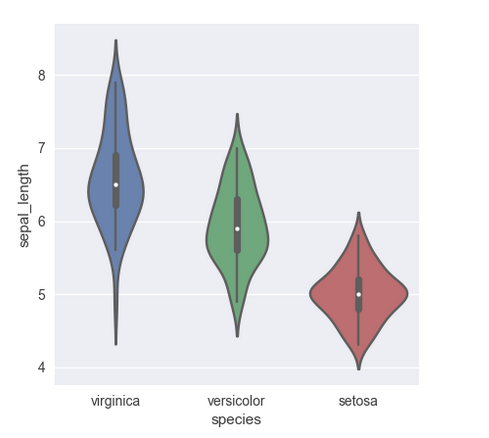

Order by decreasing median

In [51]:
sns.color_palette('deep')

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [52]:
np.array(sns.color_palette('deep'))

array([[0.29803922, 0.44705882, 0.69019608],
       [0.86666667, 0.51764706, 0.32156863],
       [0.33333333, 0.65882353, 0.40784314],
       [0.76862745, 0.30588235, 0.32156863],
       [0.50588235, 0.44705882, 0.70196078],
       [0.57647059, 0.47058824, 0.37647059],
       [0.85490196, 0.54509804, 0.76470588],
       [0.54901961, 0.54901961, 0.54901961],
       [0.8       , 0.7254902 , 0.45490196],
       [0.39215686, 0.70980392, 0.80392157]])

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

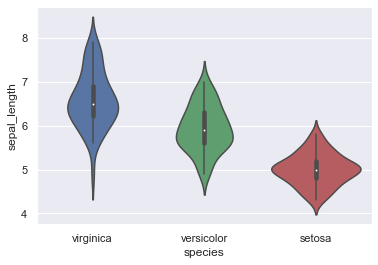

In [54]:
# library & dataset
import seaborn as sns
df = sns.load_dataset('iris')
palette = np.array([sns.color_palette('deep')[0],sns.color_palette('deep')[2],sns.color_palette('deep')[3]])
# Find the order
my_order = df.groupby(by=["species"])["sepal_length"].median().iloc[::-1].index
 
# Give it to the violinplot
sns.violinplot(x='species', y='sepal_length', data=df, order=my_order,  palette=palette)

### Barplot

In [55]:
df = sns.load_dataset('penguins')

<AxesSubplot:xlabel='species', ylabel='bill_length_mm'>

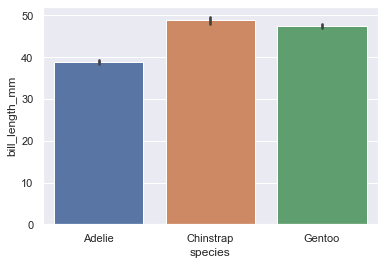

In [56]:
sns.barplot(data=df, x='species', y='bill_length_mm')

<AxesSubplot:xlabel='species', ylabel='body_mass_g'>

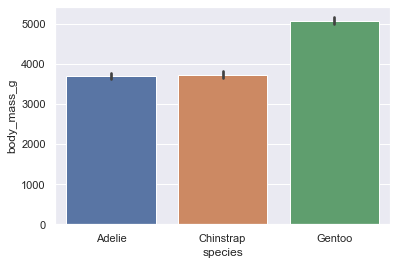

In [57]:
sns.barplot(data=df, x='species', y='body_mass_g')

<AxesSubplot:xlabel='species', ylabel='count'>

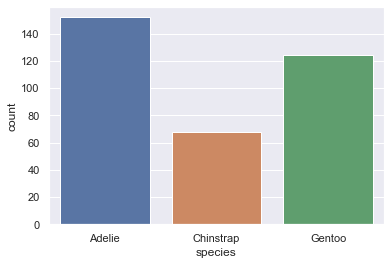

In [59]:
sns.countplot(data=df, x='species')

<AxesSubplot:xlabel='species', ylabel='count'>

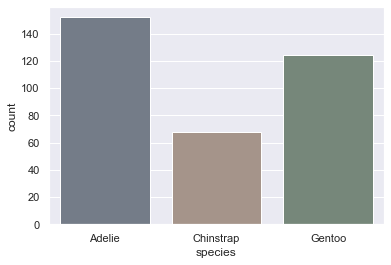

In [60]:
sns.countplot(data=df, x='species',saturation=0.2)

<AxesSubplot:xlabel='species', ylabel='count'>

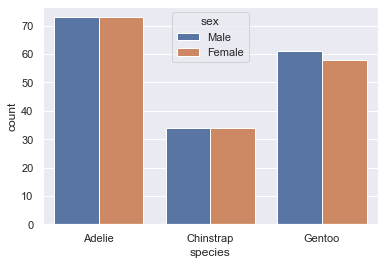

In [62]:
sns.countplot(data=df, x='species',hue='sex')

# Point plot
A point plot represents an estimate of central tendency for a numeric variable by the position of scatter plot points and provides some indication of the uncertainty around that estimate using error bars.



<AxesSubplot:xlabel='species', ylabel='bill_length_mm'>

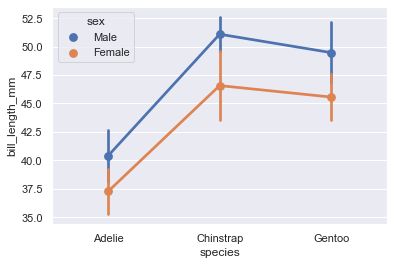

In [63]:
sns.pointplot(data=df, x='species', y='bill_length_mm', hue='sex', ci='sd')

<AxesSubplot:xlabel='species', ylabel='bill_length_mm'>

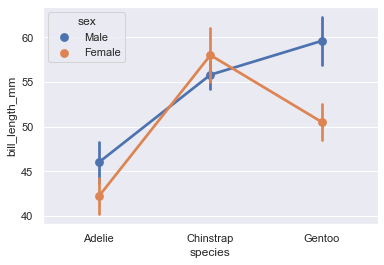

In [65]:
sns.pointplot(data=df, x='species', y='bill_length_mm', hue='sex', ci='sd',estimator=np.max)

### Heatmap

In [66]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [70]:
mean_flipper = df.groupby(['species','island'])['flipper_length_mm'].mean()
mean_flipper

species    island   
Adelie     Biscoe       188.795455
           Dream        189.732143
           Torgersen    191.196078
Chinstrap  Dream        195.823529
Gentoo     Biscoe       217.186992
Name: flipper_length_mm, dtype: float64

In [71]:
mean_flipper.unstack()

island,Biscoe,Dream,Torgersen
species,,,
Adelie,188.795455,189.732143,191.196078
Chinstrap,NaN,195.823529,NaN
Gentoo,217.186992,NaN,NaN


<AxesSubplot:xlabel='island', ylabel='species'>

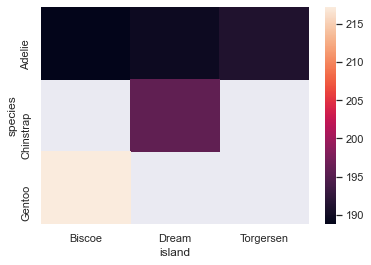

In [72]:
sns.heatmap(mean_flipper.unstack())

<AxesSubplot:>

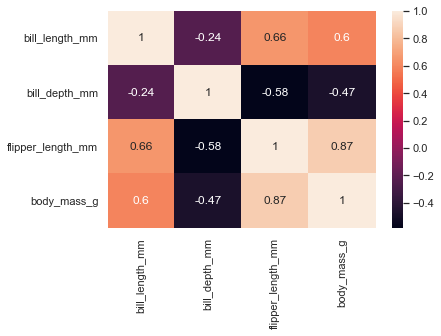

In [73]:
sns.heatmap(df.corr(), annot=True)
#plt.gcf().set_size_inches(12,8)

<AxesSubplot:>

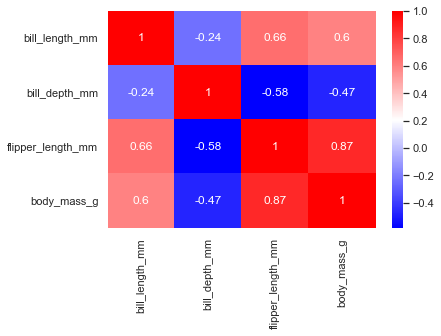

In [74]:
sns.heatmap(df.corr(), annot=True, cmap='bwr')

#plt.gcf().set_size_inches(12,8)

In [75]:
from matplotlib import cm

cmap = cm.get_cmap('bwr')
cmap.set_over()

<ipython-input-75-19b684debf64>:4: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("bwr"))
  cmap.set_over()


# cluster map

https://seaborn.pydata.org/generated/seaborn.clustermap.html#seaborn.clustermap

In [76]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


ValueError: could not convert string to float: 'Adelie'

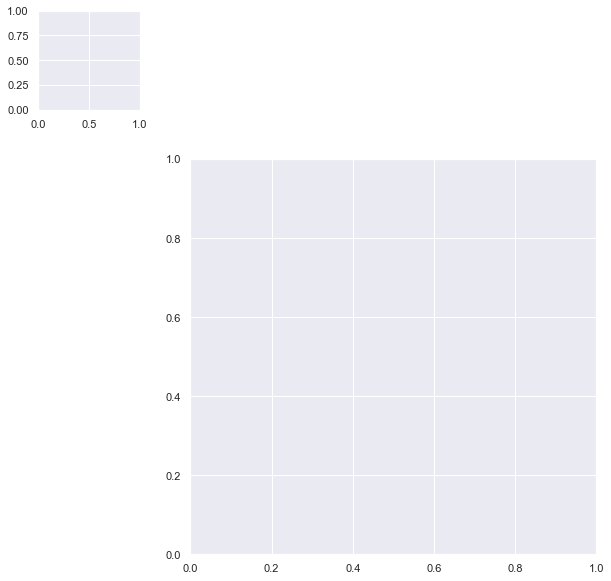

In [77]:
#sns.set_theme(color_codes=True)
#df = sns.load_dataset("iris")
#species = df.pop("species")
g = sns.clustermap(df)

# PANDAS

https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

Menos interesante que hacer las cosas directamente con `matplotlib`, es menos potente.

In [79]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<AxesSubplot:xlabel='petal_length'>

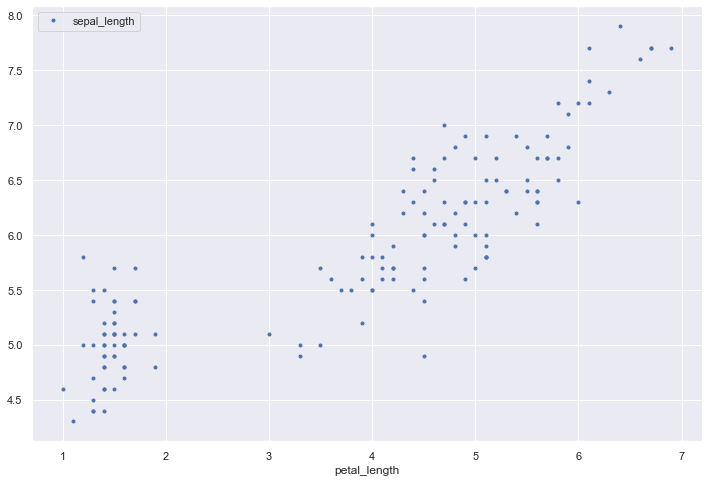

In [80]:
fig,ax=plt.subplots(figsize=(12,8))

df.plot(x='petal_length',y='sepal_length',ax=ax,linestyle='',marker='.')

#### Parallel coordinates plot
Parallel plot or Parallel Coordinates Plots allow to compare the feature of several individual observations on a set of numerical variables

In [81]:
from pandas.plotting import parallel_coordinates

<AxesSubplot:>

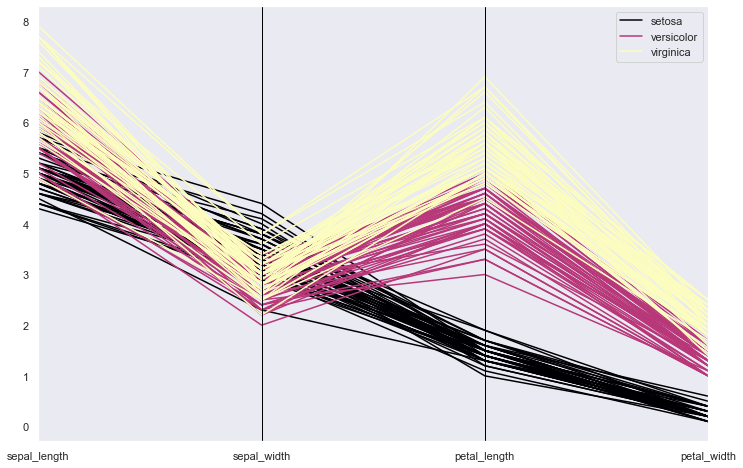

In [83]:
fig,ax=plt.subplots(figsize=(12,8))

parallel_coordinates(df, 'species',ax=ax,colormap=plt.get_cmap('magma'))

#### autocorrelation plots

Autocorrelation plots are often used for checking randomness in time series. This is done by computing autocorrelations for data values at varying time lags. If time series is random, such autocorrelations should be near zero for any and all time-lag separations. If time series is non-random then one or more of the autocorrelations will be significantly non-zero. The horizontal lines displayed in the plot correspond to 95% and 99% confidence bands.

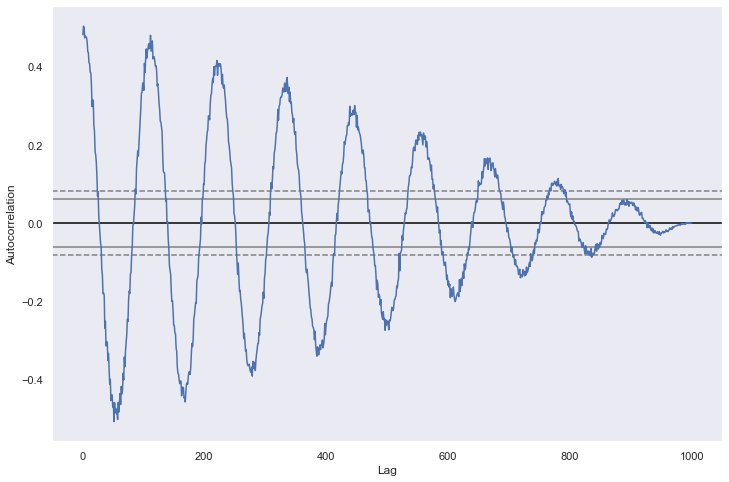

In [84]:
from pandas.plotting import autocorrelation_plot

fig,ax=plt.subplots(figsize=(12,8))

spacing = np.linspace(-9*np.pi, 9* np.pi, num=1000)

data = pd.Series(0.7 * np.random.rand(1000) + 0.3 * np.sin(spacing))

autocorrelation_plot(data,ax=ax);

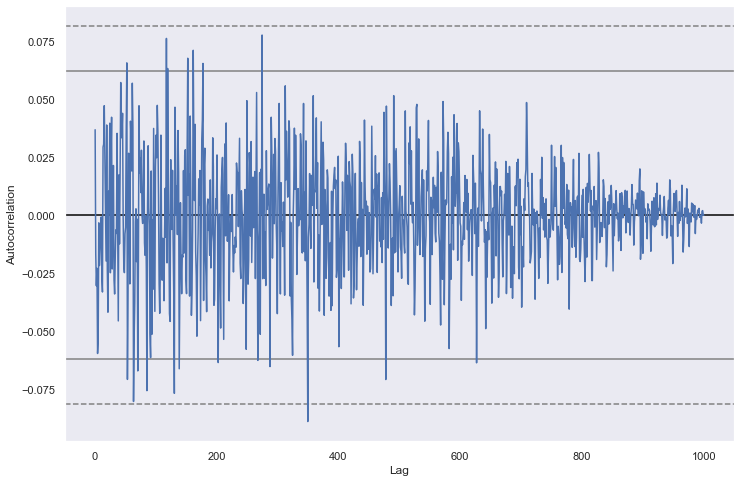

In [85]:
fig,ax=plt.subplots(figsize=(12,8))

spacing = np.linspace(-9*np.pi, 9* np.pi, num=1000)

data = pd.Series(0.7 * np.random.rand(1000))

autocorrelation_plot(data,ax=ax);